# Orizon: Frequência de Exames Adicionais

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

Lendo os dados para a dataframe:

In [2]:
df = pd.read_csv("../full_extracts/data1.csv", encoding = "ISO-8859-1")

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['\'data\''].loc[df['\'servico\''].str.contains(r'^.(?!\d+).*')] = 'Deslocado'
df['\'tipo_item\''].loc[df['\'data\''] == 'Deslocado'] = df['\'desc_tipoalta\''].loc[df['\'data\''] == 'Deslocado']
df['\'servico\''].loc[df['\'data\''] == 'Deslocado'] = df['\'descricao_despesa\''].loc[df['\'data\''] == 'Deslocado']
df['\'descricao_despesa\''].loc[df['\'data\''] == 'Deslocado'] = df['\'qtde\''].loc[df['\'data\''] == 'Deslocado']
df['\'qtde\''].loc[df['\'data\''] == 'Deslocado'] = df['\'valor\''].loc[df['\'data\''] == 'Deslocado']
df['\'valor\''].loc[df['\'data\''] == 'Deslocado'] = df['\'origem\''].loc[df['\'data\''] == 'Deslocado']

Selecionando apenas os campos relevantes para esta análise:

In [4]:
selected_df = pd.concat([df["'id_conta'"], df["'servico'"], df["'descricao_despesa'"], df["'tipo_item'"]], axis=1)

Removendo as aspas das labels para facilitar o trabalho:

In [5]:
selected_df.columns = ["id_conta", "servico", "descricao", "tipo_item"]

Vamos trabalhar apenas com os id_conta atrelados à mais de um serviço:

In [6]:
count_df = selected_df.groupby("id_conta").count()

In [7]:
def get_count(acc_id):
    return count_df.lookup([acc_id], ["servico"])[0]

In [8]:
selected_df["count"] = selected_df["id_conta"].map(get_count)

In [9]:
selected_df = selected_df[selected_df["count"] > 1].drop("count", axis=1)

Algumas observações possuem apenas " no campo serviço, vamos filtra-las também:

In [10]:
selected_df = selected_df[selected_df["servico"] != '"']
selected_df = selected_df[selected_df["servico"] != "''"]
selected_df = selected_df[selected_df["servico"] != ""]
selected_df = selected_df[selected_df["servico"] != " "]

Montaremos agora nossa tabela principal: ela terá uma coluna para cada serviço disponível no dataset, uma coluna para a porcentagem de id_conta's em que aquele serviço aparece, outra coluna para o tipo de item daquele serviço e outra para sua descrição.

Primeiro, vamos definir uma função para computar a porcentagem dos id_conta em que cada serviço aparece:

In [11]:
unique_acc_ids = len(selected_df["id_conta"].unique())
def get_percentage(service):
    count_num = len(selected_df[selected_df["servico"] == service]["id_conta"].unique())
    return (float(count_num) / unique_acc_ids) * 100.0

Agora, uma função para pegar uma descrição qualquer para cada serviço:

In [12]:
def get_description(service):
    return selected_df[selected_df["servico"] == service]["descricao"].iloc[0]

E uma função para pegar o tipo de item para cada serviço:

In [13]:
def get_item_type(service):
    return selected_df[selected_df["servico"] == service]["tipo_item"].iloc[0]

Agora que todas as funções estão prontas, podemos montar a dataframe:

In [14]:
all_services = selected_df["servico"].unique()
percentages = [get_percentage(service) for service in all_services]
descriptions = [get_description(service) for service in all_services]
item_types = [get_item_type(service) for service in all_services]
df_dict = {'servico': all_services, '%': percentages, "descricao": descriptions, "tipo de item": item_types}
final_df = pd.DataFrame(df_dict)

E selecionamos os serviços em que aparecem em mais de 20% dos id_conta para exibição:

In [15]:
final_df[final_df["%"] > 20].sort_values("%", axis=0, ascending=False)

,%,descricao,servico,tipo de item
0,100.000000,'ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'30726034','PROCEDIMENTO'
22,38.510301,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...,'40304361','PROCEDIMENTO'
13,35.974643,'DIPIRONA 1G AMPOLA 2ML','90196031','MEDICAMENTOS'
76,35.023772,'CREATININA','40301630','PROCEDIMENTO'
62,34.389857,'URIA','40302580','PROCEDIMENTO'
46,34.072900,'POTSSIO','40302318','PROCEDIMENTO'
60,33.993661,'SDIO','40302423','PROCEDIMENTO'
217,31.695721,'JOELHO','40804054','PROCEDIMENTO'
67,30.744849,'ATENDIMENTO MEDICO DO INTENSIVISTA EM UTI GER...,'10104020','PROCEDIMENTO'
151,26.545166,'SERINGA SEM AG.20ML LUER SLIP PLASTIPAK 990173','70705348','MATERIAIS'


Vamos agora fazer uma analise também dos tipos de item, vendo qual a porcentagem dos id_conta em que cada um deles aparece: 

In [16]:
item_type_dict = {}
for tipo in selected_df["tipo_item"].unique():
    item_type_dict[tipo] = len(selected_df[selected_df["tipo_item"] == tipo]["id_conta"].unique()) * 100 / 50.0

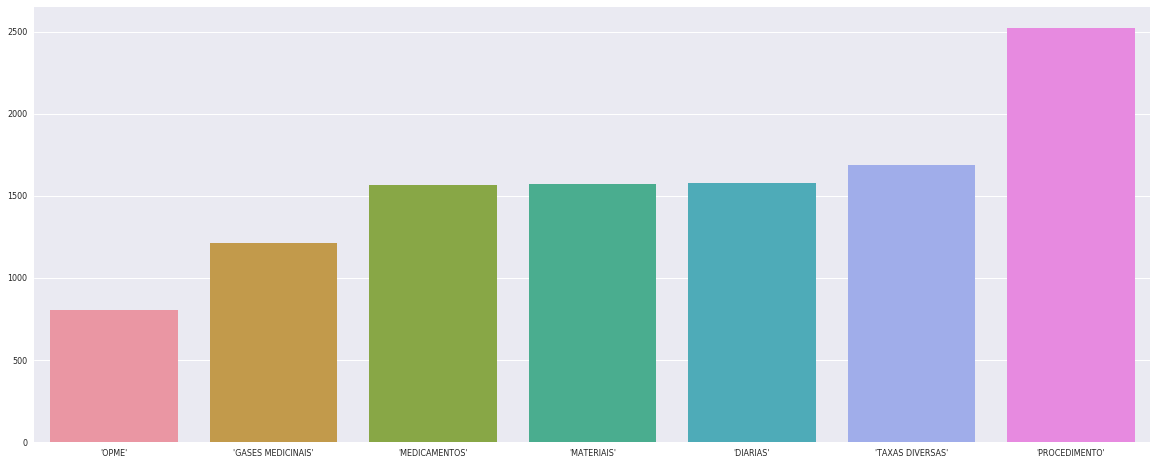

In [17]:
%matplotlib inline 
tup_list = [(key, item_type_dict[key]) for key in item_type_dict.keys()]
sorted_list = sorted(tup_list, key=lambda tup: tup[1])
sb.set(font_scale=0.8)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 8)
sb.barplot(x=[tup[0] for tup in sorted_list], y=[tup[1] for tup in sorted_list],ax=ax)

Gerando uma tabela para cada tipo de item:

In [18]:
for item in final_df["tipo de item"].unique():
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("-------------" + item + "-------------")
        display(final_df[(final_df["tipo de item"] == item) & (final_df["%"] > 5)].drop("tipo de item", axis=1).sort_values("%", axis=0, ascending=False))


-------------'PROCEDIMENTO'-------------


,%,descricao,servico
0,100.000000,'ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'30726034'
22,38.510301,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...,'40304361'
76,35.023772,'CREATININA','40301630'
62,34.389857,'URIA','40302580'
46,34.072900,'POTSSIO','40302318'
60,33.993661,'SDIO','40302423'
217,31.695721,'JOELHO','40804054'
67,30.744849,'ATENDIMENTO MEDICO DO INTENSIVISTA EM UTI GER...,'10104020'
43,25.990491,'MAGNSIO','40302237'
231,24.881141,'ASSISTENCIA FISIATRICA RESPIRATORIA EM DOENTE...,'20203047'


-------------'MATERIAIS'-------------


,%,descricao,servico
151,26.545166,'SERINGA SEM AG.20ML LUER SLIP PLASTIPAK 990173','70705348'
518,24.722662,'SERINGA SEM AG.10ML LUER-LOK PLASTIPAK 990172','70705330'
255,22.662441,'AGULHA DESC. 40 X 12 (BD)','70014370'
156,19.492868,'SERINGA SEM AG.05ML LUER-LOK 990175','70705313'
40,17.749604,'FIO CIRURGICO MONONYLON 3.0 1171T','70259496'
92,16.719493,'LAMINA BISTURI N.15','70360812'
177,15.610143,'CATETER NASAL OXIGENIO TP.OCULOS 140CM 2807P','0002340147'
753,14.342314,'ACESSORIO PARA TRANSFERENCIA SOLUCAO 2PTA PER...,'70001871'
110,13.074485,'AGULHA PARA ASPIRACAO 25X12 305243','70015368'
16,12.916006,'POLIFIX ADULTO 2 VIAS COM CLAMP','70223769'


-------------'MEDICAMENTOS'-------------


,%,descricao,servico
13,35.974643,'DIPIRONA 1G AMPOLA 2ML','90196031'
9,25.673534,'CEFAZOLINA 1G FRASCO','90008332'
63,25.198098,'DEXAMETASONA 4MG/ML FRASCO 2,'90003551'
242,20.839937,'NEOCAINA 0,'90047257'
593,20.522979,'CLEXANE 40MG/0,'90194500'
48,20.285261,'MIDAZOLAM 5MG AMP. 5ML','90184378'
64,18.938193,'SORO FISIOLOGICO 0,'90019822'
116,18.304279,'DORMONID','90184360'
88,17.828843,'ONDANSETRONA 4MG AMP.','90090861'
50,17.749604,'SULFATO DE EFEDRINA 50MG AMP','90045980'


-------------'TAXAS DIVERSAS'-------------


,%,descricao,servico
142,22.028526,'TAXA DE REFEICAO DE ACOMPANHANTE (ALMOCO OU J...,'60033533'
387,19.809826,'TAXA DE SALA CIRURGICA,'60023155'
31,18.858954,'TAXA DE SALA DE RECUPERACAO POSANESTESICA','60023180'
23,16.006339,'TAXA DE SALA CIRURGICA PORTE 5','60023147'
376,13.153724,'TAXA DE REGISTRO DE INTERNACAO','60033568'
227,12.519810,'GARROTE PNEUMATICO','60026987'
66,12.282092,'TAXA DE BISTURI ELETRICO EM CENTRO CIRURGICO','60025565'
245,11.251981,'BISTURI ELETRICO (CAUTERIO)','60026227'
179,10.855784,'TAXA DE REFEICAO DE ACOMPANHANTE (CAFE DA MAN...,'60033541'
402,10.063391,'TAXA DE APLICACAO DE INJECAO EV FORA DA UTI/S...,'60015292'


-------------'DIARIAS'-------------


,%,descricao,servico
135,23.217116,'DIARIA DE UTI ADULTO GERAL','60001038'
79,13.153724,'DIARIA DE APARTAMENTO COMPLETO','60000651'
411,12.044374,'DIARIA DE QUARTO COLETIVO DE 2 LEITOS COM BA...,'60000805'
982,10.221870,'DIARIA DE APARTAMENTO SIMPLES','60000554'


-------------'GASES MEDICINAIS'-------------


,%,descricao,servico
441,19.968304,'OXIGENIO POR HORA','60034335'
382,8.795563,'CATETER PARA OXIGENIO,'60028378'


-------------'OPME'-------------


,%,descricao,servico
375,7.210777,'TAXA DE OPERACIONALIZACAO','60033487'
